In [54]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 

In [55]:
dataset = pd.read_csv("../FINAL_CSVs/DATASET_MDs.csv")

In [56]:
X_values = dataset.drop(columns=["MRID","diagnosis"])
Y_values = dataset["diagnosis"]

In [57]:
X_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42) #dividir datasets

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
#Crear pipeline
#pipeline = Pipeline([('scaler',StandardScaler(),('pca',PCA(n_components=40)),('rf',RandomForestClassifier()])

In [70]:
pca_40 = PCA(n_components=40)
X_pca_40 = pca_40.fit_transform(X_train_scaled)
X_test_pca = pca_40.transform(X_test_scaled)

rf_on_pca_40 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_on_pca_40.fit(X_pca_40, y_train)
rf_top_35_pca_indices = rf_on_pca_40.feature_importances_.argsort()[-35:][::-1]
X_pca_rf_35 = X_pca_40[:, rf_top_35_pca_indices]
X_test_pca_35 = X_test_pca[:, rf_top_35_pca_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=20)
X_final = anova_final_selector.fit_transform(X_pca_rf_35, y_train)
X_test = anova_final_selector.transform(X_test_pca_35)


svm_model = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42)
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y, y_predict)
accuracy

0.8142857142857143

In [62]:
print(y_predict)
print(list(y_test))

[0 2 2 0 0 2 2 0 2 0 1 0 0 0 2 1 0 0 2 1 0 1 2 1 0 1 2 1 1 0 2 0 1 1 2 2 1
 1 0 0 1 1 2 1 2 0 1 2 1 2 2 1 2 1 2 2 1 0 1 2 2 1 1 2 1 1 0 2 0 2]
[0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2]


In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

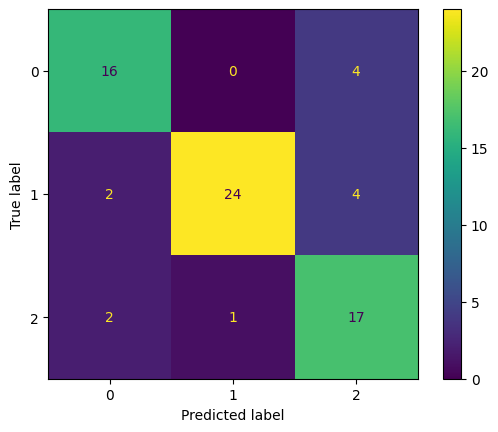

In [68]:
cf = confusion_matrix(y_test,y_predict, labels=svm_model.classes_)
DISP = ConfusionMatrixDisplay(cf, display_labels=svm_model.classes_)
DISP.plot()

In [45]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=42)

# Fit scaler on train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on train
pca_40 = PCA(n_components=40)
X_train_pca = pca_40.fit_transform(X_train_scaled)
X_test_pca = pca_40.transform(X_test_scaled)

# Fit RF on train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
top_35_idx = rf.feature_importances_.argsort()[-35:][::-1]
X_train_rf = X_train_pca[:, top_35_idx]
X_test_rf = X_test_pca[:, top_35_idx]

# Fit ANOVA on train
anova = SelectKBest(score_func=f_classif, k=20)
X_train_final = anova.fit_transform(X_train_rf, y_train)
X_test_final = anova.transform(X_test_rf)

# Train SVM
svm = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42)
svm.fit(X_train_final, y_train)

# Predict & Evaluate
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Test accuracy: 0.8143
